<a href="https://colab.research.google.com/github/deboraaires/bootcamp_alura/blob/main/Bootcamp_Datascience_Debora_B_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bootcamp Alura: Data Science Aplicada - 2020**

*Caderno de anotações de Debora Aires*

#**Módulo 01: Python e pandas para análise de dados reais**

Neste módulo serão avaliados os gastos do SUS por unidade da federação atravéz do Portal do DATASUS. Foi realizada um busca pelos dados de gastos do SUS por unidade da Federação com foco em data de internação.

Base de Dados: Dados Consolidados AIH (RD), por local de internação, a partir de 2008 -> Brasil por Região e Unidade da Federação.

Disponível em: 
https://datasus.saude.gov.br/acesso-a-informacao/producao-hospitalar-sih-sus/

Filtrado por Unidade da Federação + Ano/mês processamento + Valor total

Ou fonte2 "https://github.com/alura-cursos/agendamento-hospitalar/tree/main/dados"

## **Aula 1: Aquisição e Leitura de Dados Reais**

Dataset: Produção Hospitalar por Estado - Por Data de Processamento.


In [2]:
# Importação das bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np


**Tratamento dos dados**

Ao ler o arquivo csv, precisamos nos atentar para alguns detalhes:

*   "utf-8", é uma regra de encodar caracteres. Entretanto, o governo brasileiro e muitos lugares usam um padrão apelidado de "Latin1". O nome específico desse encoding é “ISO-8859-1”.
*   Como o arquivo vem tanto com um cabeçalho quanto com um rodapé, precisamos avisar o pandas para pular essas linhas (skiprows para o cabeçalho e skipfooter para o rodapé).
*   Seu separador (sep) é o ; (ponto-e-vírgula).
*   A opção thousands define o separador de milhares enquanto que decimal define o separador decimal.
*   Segundo o site da TabNet, dados numéricos iguais a 0 que não são resultantes de arredondamento são representados por um - (hífen). Essa terminologia é ambígua, mas nós vamos tratar os hífens como sendo valores ausentes (NaN), usando o parâmetro na_values. (sugestão do colega @Eduardo Paul)

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A151346189_28_143_208.csv'

#Criando um DataFrame em dados
dados = pd.read_csv(url,
                    encoding="ISO-8859-1", 
                    skiprows = 3,
                    skipfooter=12,
                    sep=";",
                    thousands=".",
                    decimal=",",
                    na_values='-',
                    engine='python')

#Apresenta os 5 primeiros valores
dados.head() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,NaN,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,NaN,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,302071

Os nomes da unidades da federação são todos precedidos por números. Ao inspecionar esses números com cuidado, vemos que o primeiro dígito refere-se à região a que a unidade pertence (sugestão do colega @Eduardo Paul). 

Realizando exploração inicial dos dados:

In [4]:
#Apresenta os 5 últimos valores
dados.tail() 

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,53637713.13,53699506.08,58730379.58,57629317.06,58779088.02,63366430.89,62200230.97,61683824.68,62495363.90,64614271.83,66457445.34,66425009.36,65782428.73,63714541.87,64488493.88,66304168.50,61527419.52,62490522.38,66814413.40,67900518.35,64799726.75,68518232.07,68731297.03,66174969.16,66891309.48,67456434.73,67096302.52,60754144.32,58884339.85,66205364.40,...,89585823.81,96174533.70,92176170.61,94228360.83,90655015.78,91242720.70,82934746.93,88817066.36,80572288.45,87419899.25,89396935.52,88148251.61,90754504.49,89093690.14,94010888.97,93664724.68,90025945.36,93081292.31,89050712.34,89664703.23,89259306.50,85585754.75,95152786.47,94163838.23,92237333.46,1.022983e+08,1.002601e+08,95917106.56,1.023316e+08,93971904.79,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,1.013743e+08,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,9547923.55,9450010.19,8365709.79,10033643.71,10746263.10,10849523.03,10902848.13,11991649.26,12050259.66,12174950.98,11178470.01,11997775.92,11686533.15,10756188.43,10565385.71,12148432.58,11270972.80,11947693.50,11435565.54,12392541.52,12441459.98,12025317.84,12353546.78,12381792.58,12340247.31,12467693.91,12356930.32,11209008.55,9656677.02,13698836.79,...,15676843.15,16956118.78,17043069.32,17477126.81,15488155.75,16596703.72,15353997.67,16320629.25,18448053.83,16620321.36,16682027.02,17555832.83,17357780.20,17090876.79,16468255.95,17395858.50,16259261.13,16390075.24,15350893.92,17108719.02,17713810.57,16882690.96,18253870.27,17778458.45,18387822.48,1.987093e+07,1.891386e+07,19591383.84,1.893544e+07,17230688.81,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,1.924162e+07,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,9677093.95,7150345.50,10421826.32,9939399.66,9332546.32,11965500.15,11185014.96,12058150.55,11635436.04,11698836.48,11823239.61,10810420.65,12130636.06,11574096.75,10726251.53,12364760.67,11382133.07,11947040.32,12233217.84,12656421.09,11263407.74,12795267.96,12805173.87,12171713.91,11961452.83,11777799.00,11142684.27,11709080.86,11149107.81,12381255.67,...,15509614.84,16372281.19,16231682.70,16044219.39,16146542.89,15487676.02,14770731.99,17253950.09,14789801.16,17498946.87,16279852.74,16103988.77,15883977.51,17163673.03,15569285.17,15630276.46,15838064.68,14815961.13,13853034.99,14229113.36,15288698.79,16045499.92,15890208.95,16092716.67,16699780.69,1.631481e+07,1.676358e+07,15608982.84,1.585564e+07,15811477.04,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,1.779065e+07,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,20621423.04,17094580.10,21615561.61,20678552.05,23043942.78,23334312.45,23508108.16,23947606.91,24369848.15,24577126.64,24372626.65,25227845.74,24746686.90,24628958.50,25524615.37,23352380.22,23520045.07,25369725.89,24404417

In [5]:
# informaçoes da tabela
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(153), object(1)
memory usage: 32.6+ KB


In [6]:
#descrição estatística de um DataFrame
dados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.600000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,...,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.600000e+01,2.700000e+01
mean,1.512685e+07,2.271016e+07,2.459419e+07,2.543196e+07,2.651125e+07,2.785858e+07,2.833297e+07,2.780032e+07,2.788751e+07,2.714885e+07,2.474878e+07,2.873955e+07,2.777958e+07,2.802152e+07,3.118086e+07,3.055947e+07,3.206774e+07,3.158067e+07,3.261120e+07,3.306823e+07,3.359479e+07,3.241981e+07,3.218939e+07,3.116798e+07,3.156009e+07,2.992881e+07,3.299925e+07,3.341603e+07,3.386193e+07,3.299857e+07,3.377663e+07,3.450811e+07,3.357103e+07,3.320255e+07,3.426058e+07,3.372213e+07,3.306842e+07,3.274396e+07,3.454084e+07,3.483417e+07,...,4.485862e+07,4.644534e+07,4.694370e+07,4.581992e+07,4.631066e+07,4.537205e+07,4.451216e+07,4.513069e+07,4.298447e+07,4.628040e+07,4.687294e+07,4.740435e+07,4.714298e+07,4.820453e+07,4.876378e+07,4.713071e+07,4.799957e+07,4.645374e+07,4.512771e+07,4.771386e+07,4.543018e+07,4.719978e+07,4.816447e+07,5.027433e+07,4.845567e+07,5.085898e+07,5.108601e+07,4.950977e+07,5.115926e+07,4.865212e+07,4.723330e+07,4.914862e+07,4.761848e+07,4.759367e+07,4.101366e+07,4.419363e+07,4.732999e+07,5.449551e+07,5.650503e+07,5.993732e+09
std,1.915919e+07,3.087944e+07,3.251673e+07,3.333907e+07,3.754077e+07,3.867689e+07,3.929297e+07,3.774891e+07,3.822654e+07,3.667139e+07,3.430265e+07,3.926323e+07,3.798802e+07,3.847297e+07,4.310788e+07,4.137587e+07,4.382047e+07,4.373064e+07,4.493195e+07,4.676027e+07,4.489069e+07,4.472374e+07,4.465751e+07,4.249073e+07,4.345134e+07,4.112873e+07,4.590237e+07,4.661917e+07,4.658377e+07,4.580069e+07,4.662104e+07,4.756922e+07,4.704992e+07,4.517352e+07,4.835110e+07,4.796588e+07,4.603549e+07,4.662189e+07,4.871679e+07,4.792798e+07,...,5.770511e+07,6.234915e+07,6.250715e+07,5.928142e+07,6.017879e+07,5.942427e+07,5.889815e+07,5.906176e+07,5.650940e+07,6.049750e+07,6.114294e+07,6.192571e+07,6.115437e+07,6.221664e+07,6.337072e+07,6.072640e+07,6.248640e+07,6.045441e+07,5.991645e+07,6.282883e+07,5.936300e+07,6.111061e+07,6.293618e+07,6.457698e+07,6.235590e+07,6.532398e+07,6.636032e+07,6.343915e+07,6.631342e+07,6.226009e+07,6.060018e+07,6.423455e+07,6.131808e+07,6.217103e+07,5.290071e+07,5.685693e+07,6.225531e+07,7.397429e+07,7.229108e+07,8.057807e+09
min,6.578895e+05,7.779393e+05,7.186880e+05,8.399944e+05,8.623480e+05,8.324407e+05,9.966931e+05,8.942712e+05,9.104242e+05,1.191770e+

In [7]:
# Os números são representados em notacão cientifica
dados.mean()

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
2020/Ago    5.650503e+07
Total       5.993732e+09
Length: 153, dtype: float64

In [8]:
#Ajusta a formatação do display dos números. Neste caso, estamos alterando o "display" de float para duas casas decimais
pd.options.display.float_format = "{:.2f}".format 

In [9]:
# Visualizando a média após a configuração do display
dados.mean()

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
2020/Ago     56505034.29
Total      5993731798.30
Length: 153, dtype: float64

In [10]:
#A primeira coluna é o índice e a segunda é uma série. Uma série é uma única coluna com esses valores.
dados["2008/Ago"] 

0      3231494.61
1      2089107.14
2      9352532.70
3       894271.18
4     23341218.03
5      1475551.38
6      5413710.38
7     15195312.89
8     10549176.40
9     27851438.72
10    10640817.47
11    12872578.37
12    35457038.66
13     9373432.00
14     5238398.50
15    46931248.28
16    84722528.10
17    12588595.77
18    50912706.60
19   184854516.35
20    56982774.90
21    31250854.33
22    56113054.70
23     9671553.45
24     9243148.81
25    20650730.67
26    13710857.89
Name: 2008/Ago, dtype: float64

In [11]:
# Media somente da coluna 2008/Ago
dados["2008/Ago"].mean()

27800320.306666665

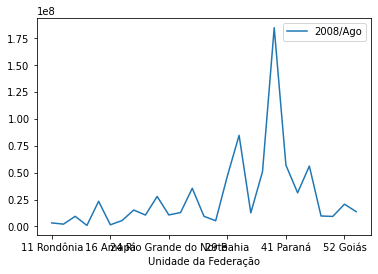

In [12]:
# Plot gera um gráfico de linha. O gráfico em linha não é adequado para valores em categorias distintas, no caso, gastos em diferentes estados.
dados.plot(x='Unidade da Federação', y='2008/Ago');

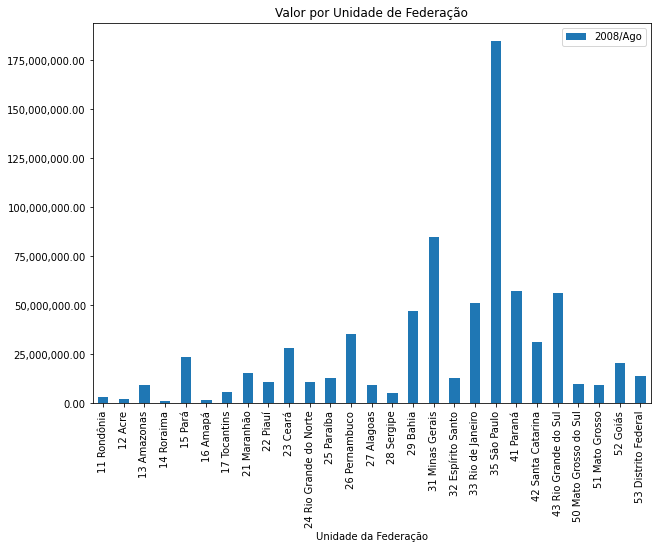

In [13]:
# kind="bar" apresenta um gráfico do tipo histogreama
# figsize altera as dimensões da imagem
ax = dados.plot(x="Unidade da Federação",y="2008/Ago",kind="bar",figsize=(10,7))

# formata os labels do eixo y com duas casas decimais e separador de milhares, que no padrão americano é vírgula (,).
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}")) 
plt.title("Valor por Unidade de Federação")

# evita saída de texto antes do gráfico
plt.show()

### Desafio 01: Escolher um título mais descritivo, que passe a mensagem adequada ao gráfico de barras.





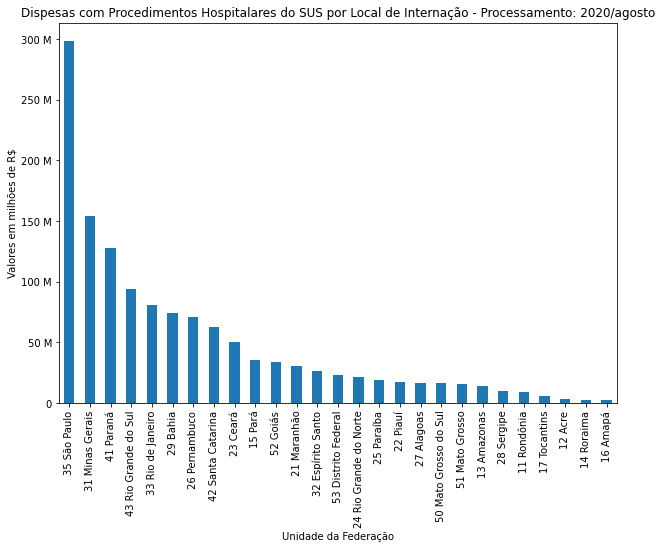

In [14]:
# reordena dados em ordem decrescente antes de plotar
ax = dados.sort_values("2018/Ago", ascending=False).plot(x="Unidade da Federação",y="2018/Ago",kind="bar",figsize=(10,7))

# formata os labels do eixo y para a notação de engenharia
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# adiciona título e nome dos eixos
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação - Processamento: 2020/agosto")
plt.ylabel("Valores em milhões de R$")

# remove legenda pois o título já é autoexplicativo
ax.get_legend().remove()
plt.show()

### Desafio 02: Faça a mesma análise realizada em aula, porém para o mês mais recente.








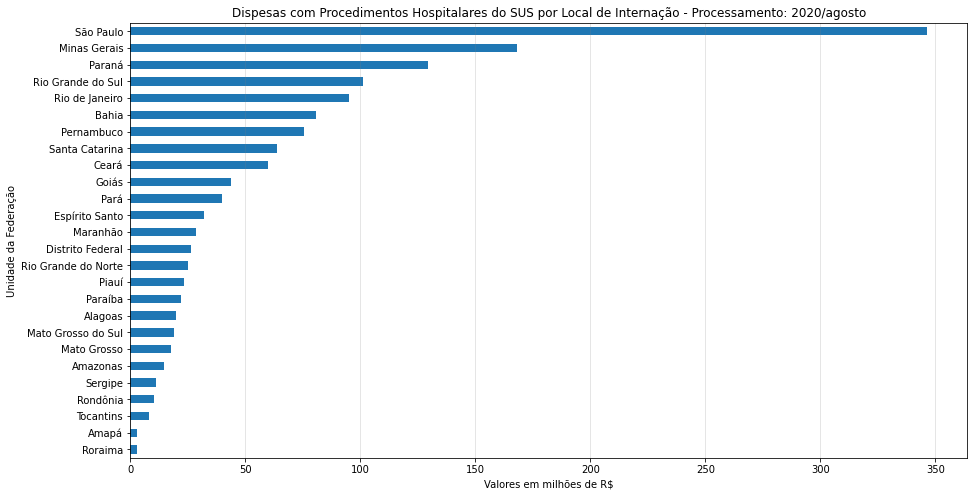

In [15]:
# Baseado na solução do colega @Marcos Martins
# Atenção: utilize na_values='-' dentro da clausula pd.read_csv() para transformar o '-' em nulo

# remove os estados sem dados no mês e separa somente o mês específico, ordenando em ordem crescente
Agosto2020UF = dados.query("`2020/Ago` >= 0")[["Unidade da Federação", "2020/Ago"]].sort_values("2020/Ago")

# remove os números na frente dos nomes dos estados ordenados
labels = Agosto2020UF["Unidade da Federação"].str[3:]

# divide valores por 1000000 para facilitar a visualização
Agosto2020 = Agosto2020UF["2020/Ago"]/1000000

# plot de uma série do tipo barra horizontal
ax = Agosto2020.plot(y="2020/Ago",kind="barh",figsize=(15,8))

# adiciona grid para facilitar visualização dos valores das barras
ax.xaxis.grid(True, linestyle='-', which='major', color='grey', alpha=.25)

# adiciona o label ordenado
ax.set_yticklabels(labels)

# adiciona título e nome dos eixos
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação - Processamento: 2020/agosto")
plt.xlabel("Valores em milhões de R$")
plt.ylabel("Unidade da Federação")
plt.show()

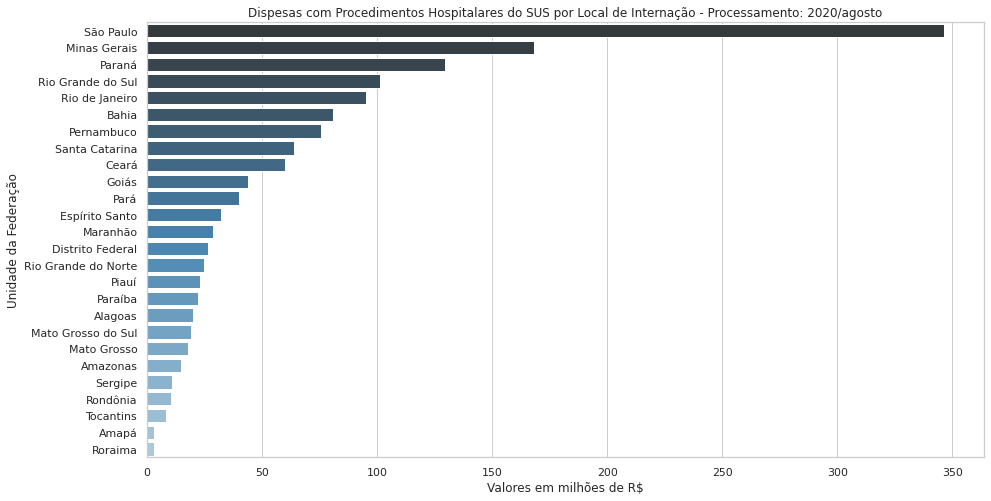

In [16]:
# Atenção: utilize na_values='-' dentro da clausula pd.read_csv() para transformar o '-' em nulo
# remove os estados sem dados no mês e separa somente o mês específico, ordenando em ordem decrescente
SAgosto2020UF = dados.query("`2020/Ago` >= 0")[["Unidade da Federação", "2020/Ago"]].sort_values(by = "2020/Ago", ascending=False)

# remove os números na frente dos nomes dos estados ordenados
labels = SAgosto2020UF["Unidade da Federação"].str[3:]

# divide valores por 1000000 para facilitar a visualização
SAgosto2020UF["2020/Ago"] = SAgosto2020UF["2020/Ago"]/1000000

# redimenciona o tamanho da figura a ser exibida
plt.figure(figsize=(15,8))

# inverte a paleta de cores para destacar o estado com mais gastos
palette = sns.color_palette("Blues_d", n_colors=26)
palette.reverse()

#adiciona um grid branco para facilitar a visualização
sns.set_theme(style="whitegrid")

# plot gráfico de barras do seaborn do tipo barra horizontal de um DataFrame
# para inverter o gráfico para barras verticais basta inverter o x com o y
s = sns.barplot(data = SAgosto2020UF, y="Unidade da Federação", x="2020/Ago", palette=palette);

# adiciona o label ordenado
s.set_yticklabels(labels);

# adiciona título e nome dos eixos
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação - Processamento: 2020/agosto")
plt.xlabel("Valores em milhões de R$");


## **Aula 2: Primeiras Visualizações de Dados**

Dataset: Produção Hospitalar por Estado - Por Data de Procedimento.

In [17]:
url2 = 'https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv'

#Criando um DataFrame em dados2
dados2 = pd.read_csv(url2,
                    encoding="ISO-8859-1", 
                    skiprows = 3,
                    skipfooter=12,
                    sep=";",
                    thousands=".",
                    decimal=",",
                    engine='python')

#Apresenta os 5 primeiros valores
dados2.head() 

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


Os dados que serão utilizados agora apresentam muitos meses sem resultados para a maioria dos estados. Assim, precisaremos realizar um tratamento específico para estes casos.



**Revisão da Monitoria 1:**

Uma opção diferente da que foi utilizada aqui seria:

dados.replace('-',0,inplace=True) #substituir os - por 0

outra opção seria:

dados.replace('-',float('Nan'),inplace=True) #substituir os - por valor nulo

Neste caso podemos encontrar os valores que são nulos com dados.isnull()




In [18]:
# aqui é apresentado um slice do DataFrame (uma parte do DataFame)
dados2[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Uma série tem uma única coluna (a série em si). Porém pode existir um index associado, o qual, por sua vez, também é uma série, porém esta é do tipo imutável. Deste caso o index é o título das colunas.

In [19]:
# Como os meses sem informação aparecem como texto ("-"), a média é mostrada somente
# para os meses que possuem somente valores numéricos
dados2.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

Como a média é calculada somente para os meses com valores válidos, podemos utilizar esta caracteristica para selecionar os índices das colunas que tenham valores válidos/usaveis (os quais são os mesmos índices das médias).

In [20]:
# o intex() retorna somente a coluna de índices
colunas_usaveis = dados2.mean().index
colunas_usaveis

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

Ao utilizarmos os índices de valores usaveis no DataFrame, temos como retorno um slice com somente as colunas que apresentam valores válidos para todos os meses, excluíndo-se aquelas que apresentavam valores do tipo texto.

In [21]:
dados2[colunas_usaveis].head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587

In [22]:
# o tolist() transforma o index (uma série do tipo imutável) em uma lista do python para poder manipula-lo
colunas_usaveis = dados2.mean().index.tolist()

# aqui estamos adicionando o índice "Unidade da Federação" na posição 0 da série colunas_usaveis
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [23]:
# Agora a Unidade da Federação também é apresentada neste slice de dados2
usaveis = dados2[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2761536.23,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161

In [24]:
# set_index() seleciona uma coluna para ser o índice do DataFrame
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,26

In [25]:
# Traz a coluna ["..."] de um DataFrame
usaveis["2019/Ago"].head()

Unidade da Federação
11 Rondônia    8909111.89
12 Acre        2981072.98
13 Amazonas   16493719.52
14 Roraima     3181321.82
15 Pará       36462011.47
Name: 2019/Ago, dtype: float64

In [26]:
# .loc traz a linha cujo índice é ["..."] de um DataFrame
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

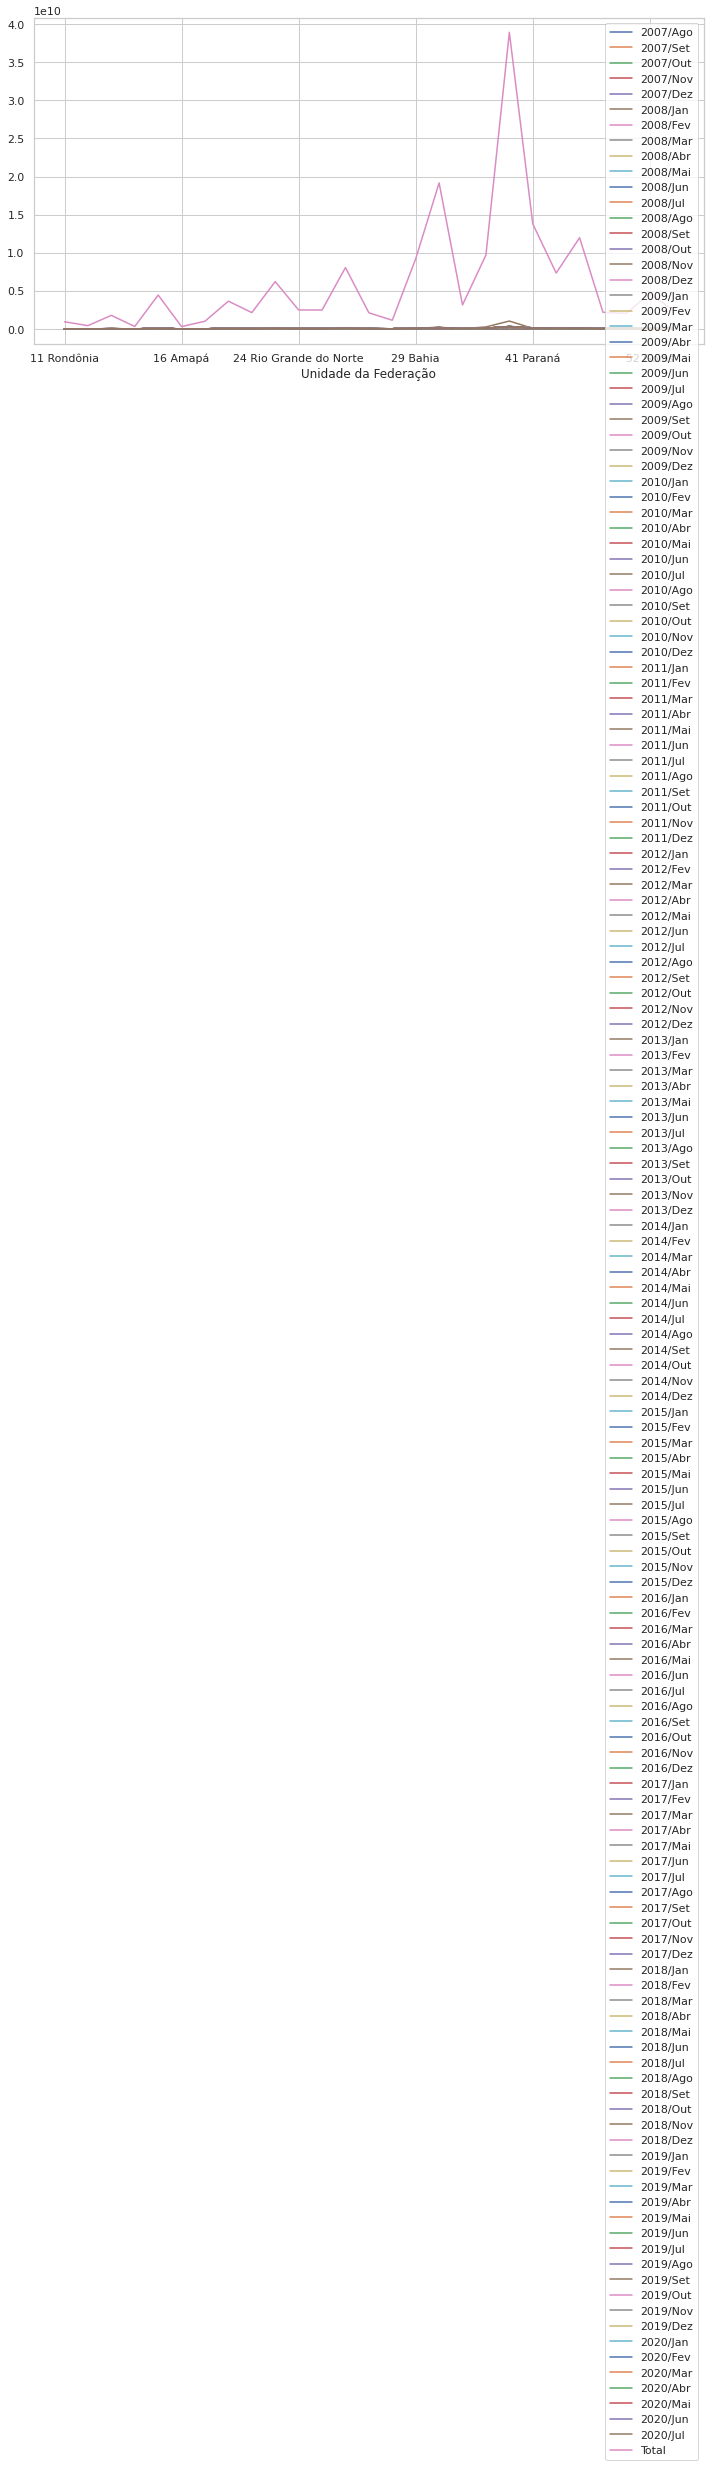

In [27]:
# um gráfico onde cada linha é um mês
usaveis.plot(figsize=(12,6))

In [28]:
# T retorna o Dataframe transposto
usaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,24 Rio Grande do Norte,25 Paraíba,26 Pernambuco,27 Alagoas,28 Sergipe,29 Bahia,31 Minas Gerais,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,134605.36,97352.78,400640.85,104243.75,27453.63,135146.36,971394.37,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,272088.08,368130.43,1088340.42,174024.90,78565.19,448349.75,2861781.50,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,684678.30,1002088.64,2973553.48,595544.54,122952.94,1382038.11,10018011.35,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,1695824.89,2149873.40,6699828.82,1125396.73,775705.52,3348779.62,21730281.63,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,4730811.68,5448177.36,16919031.39,2564966.65,2765495.63,11948984.56,43429517.54,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


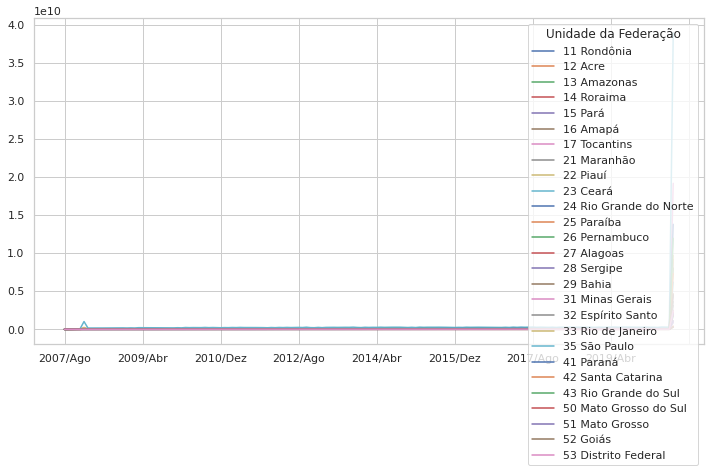

In [29]:
# um gráfico onde cada linha é um estado, porém o total ainda está no DataSete, distorcendo os resultados.
usaveis.T.plot(figsize=(12,6));

In [30]:
# Remove a série Total no eixo 1 (coluna). O eixo 0 seria a linha (default)
usaveis_total = usaveis
usaveis = usaveis.drop("Total", axis=1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2392160.30,2761536.23,26992

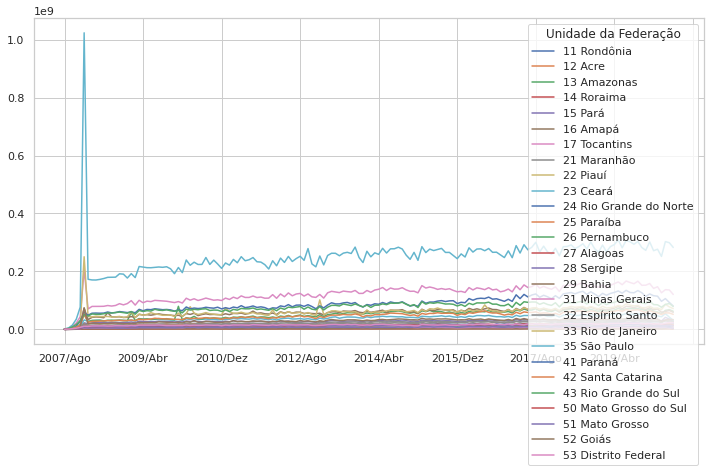

In [31]:
# um gráfico onde cada linha é um estado, sem a influência do total.
usaveis.T.plot(figsize=(12,6));

### Desafio 01: Reposicionar a legenda do gráfico em uma posição mais adequada

In [32]:
# explorando dados para descobriri mês com pico, possível erro de leitura
usaveis.T[["35 São Paulo",
           "33 Rio de Janeiro",
           "32 Espírito Santo",
           "31 Minas Gerais",
           "53 Distrito Federal"]].iloc[:20]

Unidade da Federação,35 São Paulo,33 Rio de Janeiro,32 Espírito Santo,31 Minas Gerais,53 Distrito Federal
2007/Ago,1665349.90,469469.34,57408.11,971394.37,191951.47
2007/Set,4434168.64,921646.57,284224.80,2861781.50,769966.25
2007/Out,14577395.84,2994664.57,1152115.25,10018011.35,2165619.56
2007/Nov,35032259.98,7250528.08,2296383.23,21730281.63,3813256.48
2007/Dez,76668547.41,13627123.27,5724199.54,43429517.54,7121965.42
2008/Jan,1023564534.21,250564959.99,16212109.41,205912743.65,10561085.46
2008/Fev,172834914.73,44122593.19,10032886.43,70301089.50,10215956.80
2008/Mar,170481849.56,42892665.52,12262049.08,79119005.51,11627918.26
2008/Abr,170278285.95,45295962.86,12453466.98,79046322.41,11922015.36
2008/Mai,172402180.59,43951349.46,11789786.09,79268070.12,11900817.00


In [33]:
# Remove a série 2008/Jan no eixo 1 (coluna) pois é um pico, um possível erro de leitura, que polui os dados.
usaveis = usaveis.drop("2008/Jan", axis=1)
usaveis.head()


,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,...,8133488.55,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,...,2811365.43,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,...,13717831.75,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,...,2392160.30,2761536.23,26992

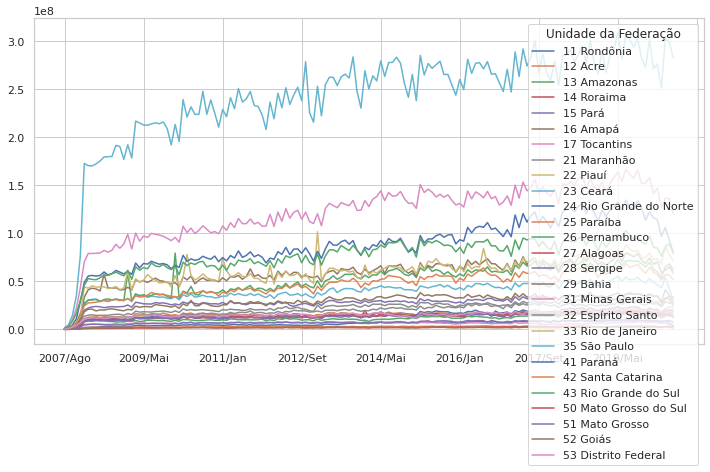

In [34]:
# um gráfico onde cada linha é um estado, sem a influência de 2008/Jan.
usaveis.T.plot(figsize=(12,6));

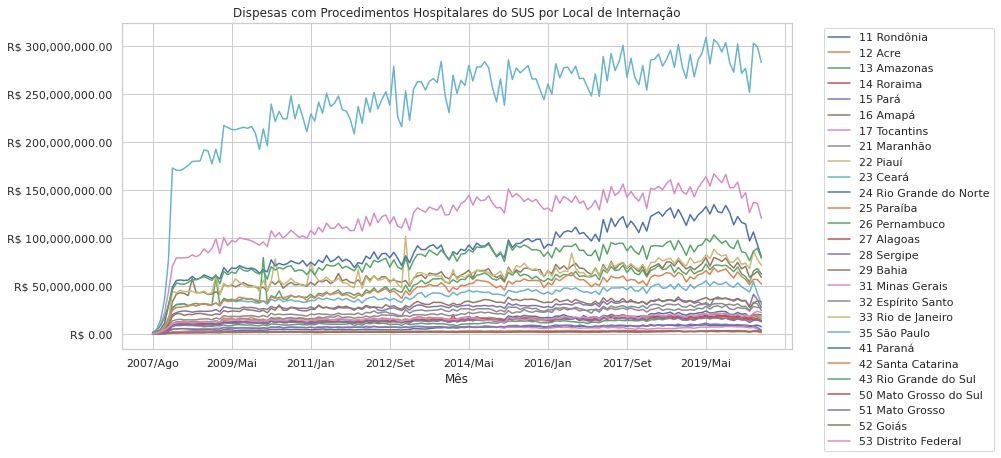

In [35]:
# um gráfico onde cada linha é um estado, sem a influência de 2008/Jan.
ax = usaveis.T.plot(figsize=(12,6));

# ajusta o formato de apresentação do eixo y para R$
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))

# bbox_to_anchor reposiciona a legenda manualemnte (Dica do colega Flavio Cardoso )
plt.legend(bbox_to_anchor=(1.04,1));
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação");
plt.xlabel("Mês");

### Desafio 02: Plotar o gráfico de linha com apenas 5 estados de sua preferência

In [36]:
# Selecionando os 5 primeiros estados com head() e depois transpor
usaveis.head().T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43


In [37]:
# Selecionando os 5 primeiros estados com iloc (o qual seleciona a linha pelo índice numérico) e depois transpor
usaveis.iloc[:5].T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43


In [38]:
# Selecionando 5 quaisquer estados com iloc (o qual seleciona a linha pelo índice numérico) e depois transpor
usaveis.iloc[[1,3,5,8,10]].T.head()

Unidade da Federação,12 Acre,14 Roraima,16 Amapá,22 Piauí,24 Rio Grande do Norte
2007/Ago,10470.07,4785.91,33672.74,220788.25,134605.36
2007/Set,14001.71,11858.63,104822.98,353468.67,272088.08
2007/Out,86200.85,43852.67,118378.28,1078182.68,684678.30
2007/Nov,301323.68,369328.51,226661.18,2406035.32,1695824.89
2007/Dez,769612.36,470676.43,844019.90,4929772.93,4730811.68


In [39]:
# Selecionando 5 quaisquer estados com loc (o qual seleciona as linas pelo índice), e depois transpor
usaveis.loc[["35 São Paulo",
             "33 Rio de Janeiro",
             "32 Espírito Santo",
             "31 Minas Gerais",
             "53 Distrito Federal"]].T.head()

Unidade da Federação,35 São Paulo,33 Rio de Janeiro,32 Espírito Santo,31 Minas Gerais,53 Distrito Federal
2007/Ago,1665349.90,469469.34,57408.11,971394.37,191951.47
2007/Set,4434168.64,921646.57,284224.80,2861781.50,769966.25
2007/Out,14577395.84,2994664.57,1152115.25,10018011.35,2165619.56
2007/Nov,35032259.98,7250528.08,2296383.23,21730281.63,3813256.48
2007/Dez,76668547.41,13627123.27,5724199.54,43429517.54,7121965.42


In [40]:
# Selecionando 5 quaisquer estados com o nome das colunas do DataSete transposto
usaveis.T[["35 São Paulo",
           "33 Rio de Janeiro",
           "32 Espírito Santo",
           "31 Minas Gerais",
           "53 Distrito Federal"]].head()

Unidade da Federação,35 São Paulo,33 Rio de Janeiro,32 Espírito Santo,31 Minas Gerais,53 Distrito Federal
2007/Ago,1665349.90,469469.34,57408.11,971394.37,191951.47
2007/Set,4434168.64,921646.57,284224.80,2861781.50,769966.25
2007/Out,14577395.84,2994664.57,1152115.25,10018011.35,2165619.56
2007/Nov,35032259.98,7250528.08,2296383.23,21730281.63,3813256.48
2007/Dez,76668547.41,13627123.27,5724199.54,43429517.54,7121965.42


Um grágico com 5 estados e com muitas datas no eixo x

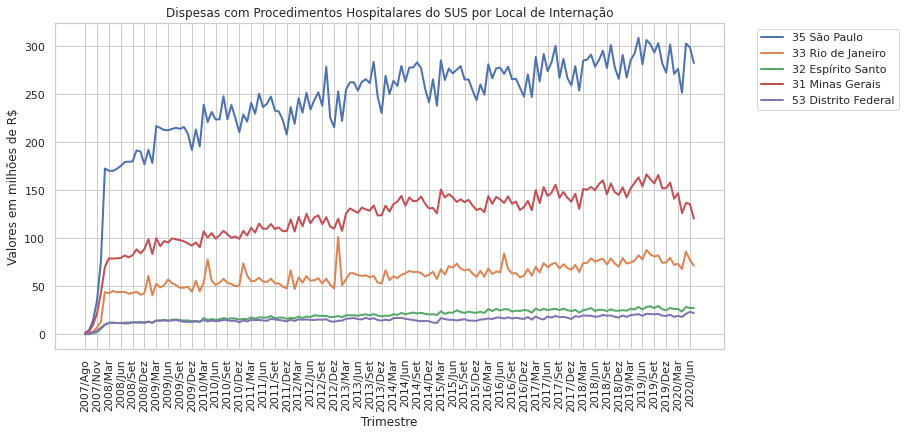

In [41]:
# Plotando resultados
ax = usaveis.T[["35 São Paulo",
           "33 Rio de Janeiro",
           "32 Espírito Santo",
           "31 Minas Gerais",
           "53 Distrito Federal"]].plot(figsize=(12,6), linewidth = 2);

#Sugestão do colega @mvgeraldi:
# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação");
plt.xlabel("Trimestre");
plt.ylabel("Valores em milhões de R$");

#Sugestão do colega @XilofonePessimista:
#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);



Dica do colega @XilofonePessimista:

**ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 12));
ax.set_xticklabels(usaveis.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 12)]);**


Basicamente, com o set_xticks() você define as posições dos ticks do eixo x e depois com set_xticklabels() você define o texto de cada tick. Quando você usou  colunas[['Amazonas', 'Pernambuco', 'São Paulo', 'Paraná', 'Goiás']].plot(figsize=(14,6), linewidth=2), ele criou um plot onde os ticks estavam em números inteiros (1,2,3,4, o que dá para confirmar com o método ax.lines[0].get_xdata(), que retorna os dados do gráfico) e depois mudou a label de cada um para seus meses. Então, eu utilizei o np.arange() para gerar números igualmente espaçados de 0 até o último dado + 1 ( ax.lines[0].get_xdata()[-1]+1), mas com espaçamento de 12 unidades entre cada tick (um ano). Depois foi só pegar as labels, que eram seus índices, obedecendo o mesmo espaçamentos de 12 unidades, para garantir que o nome do mês que aparece no tick estaria correto.

## **Aula 3: Manipulação de Dados**

Seleciona uma amostra de 5 estados aleatóriamente

In [42]:
# define a semente para números aleatórios
np.random.seed(687942)

# Selecionando 5 estados aleatoriamente
usaveis.sample(5)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,15459495.21,...,24900816.95,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,12788929.15,...,18225302.41,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6022437.54,

Seleciona os 5 estados que tiveram mais gastos

In [43]:
usaveis_total = usaveis_total.sort_values('Total', ascending=False)
usaveis_ord = usaveis_total.drop('Total', axis=1)
usaveis_ord.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.

Remover o ano de 2007 pois há registros não confiáveis

In [44]:
usaveis_ord = usaveis_ord[usaveis_ord.columns[6:]];
usaveis_ord.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

### Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.

In [45]:
# definindo as cores a serem usadas no colormaps 
# https://towardsdatascience.com/creating-colormaps-in-matplotlib-4d4de78a04b8
top = plt.get_cmap('tab10', 10)
med = plt.get_cmap('Dark2', 8)
bottom = plt.get_cmap('Pastel1', 9)
# combine it all
newcolors = np.vstack((top(np.linspace(0, 1, 10)),
                       med(np.linspace(0, 1, 8)),
                       bottom(np.linspace(0, 1, 9))))

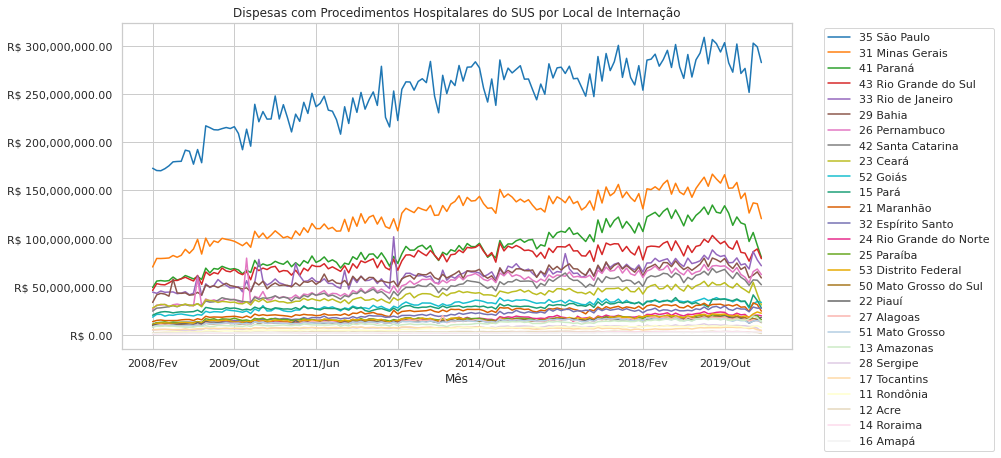

In [46]:
# um gráfico onde cada linha é um estado, sem a influência de 2008/Jan.
ax = usaveis_ord.T.plot(figsize=(12,6), color = newcolors);

# ajusta o formato de apresentação do eixo y para R$
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R$ {x:,.2f}'))

# bbox_to_anchor reposiciona a legenda manualemnte (Dica do colega Flavio Cardoso )
plt.legend(bbox_to_anchor=(1.04,1));
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação");
plt.xlabel("Mês");

### Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.

Separando o código que identifica a região da Unidade da Federação

In [47]:
# com o str permite manipular uma string
usaveis_ord.index.str[0]

Index(['3', '3', '4', '4', '3', '2', '2', '4', '2', '5', '1', '2', '3', '2',
       '2', '5', '5', '2', '2', '5', '1', '2', '1', '1', '1', '1', '1'],
      dtype='object', name='Unidade da Federação')

Criando um novo DataFrame que cotém uma coluna com o código da região da Unidade da Federação



In [48]:
# assign adiciona uma coluna extra (não pode ter espaço no nome desta coluna) com os valores especificados
usaveis_ord_reg = usaveis_ord.assign(Região = usaveis_ord.index.str[0])
usaveis_ord_reg.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,3
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,3
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,4
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56391647.77,56233758.74,

Criando um dicionário com nome para cada região de acordo com o código apresentado na Unidade da Federação e adicionando uma coluna a partir deste dicionário

In [49]:
# Define a dictionary with key values of 
# an existing column and their respective 
# value pairs as the # values for our new column.
# https://stackoverflow.com/questions/29794959/pandas-add-new-column-to-dataframe-from-dictionary
regiao_mapa = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro Oeste'}
usaveis_ord_reg['Região'] = usaveis_ord_reg['Região'].map(regiao_mapa)
usaveis_ord_reg['Região']

Unidade da Federação
35 São Paulo                   Sudeste
31 Minas Gerais                Sudeste
41 Paraná                          Sul
43 Rio Grande do Sul               Sul
33 Rio de Janeiro              Sudeste
29 Bahia                      Nordeste
26 Pernambuco                 Nordeste
42 Santa Catarina                  Sul
23 Ceará                      Nordeste
52 Goiás                  Centro Oeste
15 Pará                          Norte
21 Maranhão                   Nordeste
32 Espírito Santo              Sudeste
24 Rio Grande do Norte        Nordeste
25 Paraíba                    Nordeste
53 Distrito Federal       Centro Oeste
50 Mato Grosso do Sul     Centro Oeste
22 Piauí                      Nordeste
27 Alagoas                    Nordeste
51 Mato Grosso            Centro Oeste
13 Amazonas                      Norte
28 Sergipe                    Nordeste
17 Tocantins                     Norte
11 Rondônia                      Norte
12 Acre                          Norte
14 R

### Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

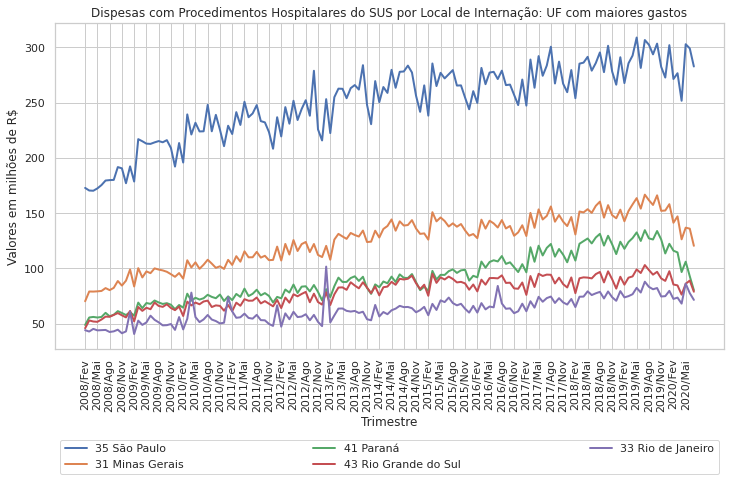

In [50]:
# Plotando resultados
ax = usaveis_ord.head().T.plot(figsize=(12,6), linewidth = 2)

# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

# ajustando a localização da legenda
plt.legend(bbox_to_anchor=(0., -0.4, 1., .102), loc="lower left", ncol = 3, mode = "expand");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: UF com maiores gastos");
plt.xlabel("Trimestre");
plt.ylabel("Valores em milhões de R$");

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis_ord.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);

### Desafio 04: Adicione mais um estado aos 5 estados plotados anteriormente

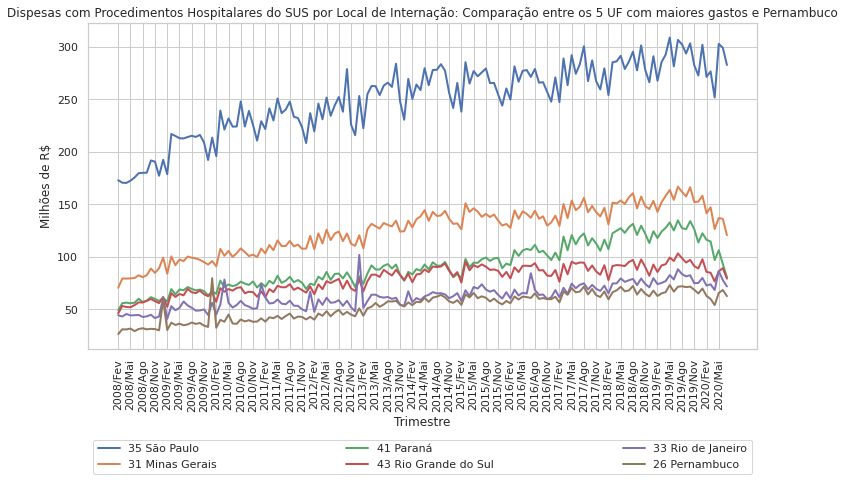

In [51]:
# o concat está juntando temporariamente 2 slices do mesmo DataFrame pela linha (lado a lado -> axis = 1)
# plot dos resultados

ax = pd.concat([usaveis_ord.head().T, 
                usaveis_ord.iloc[6]], axis = 1).plot(figsize =(12,6), linewidth = 2)

# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

# ajustando a localização da legenda
plt.legend(bbox_to_anchor=(0., -0.4, 1., .102), loc="lower left", ncol = 3, mode = "expand");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: Comparação entre os 5 UF com maiores gastos e Pernambuco");
plt.xlabel("Trimestre");
plt.ylabel("Milhões de R$");

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis_ord.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);

### Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue

Hipótese: os picos de fevereiro podem estar relacionados com casos de dengue

Segundo o artigo "Difusão espaço-tempo do dengue no Município do Rio de Janeiro, Brasil, no período de 2000-2013" de Xavier et al. (2017), os meses de março, abril e fevereiro, na escala de tempo de 2000-2013, são os meses de maior picos epidêmicos respectivamente (fonte: http://cadernos.ensp.fiocruz.br/csp/artigo/65/difuso-espao-tempo-do-dengue-no-municpio-do-rio-de-janeiro-brasil-no-perodo-de-2000-2013#:~:text=Na%20epidemia%20de%202008%2C%20o,na%20Zona%20Oeste%20do%20munic%C3%ADpio.). Desta forma, há indícios de que os picos de gastos com internações hospitalares encontrados nos mês de fevereiro, principalmente no estado do Rio de Janeiro, podem estar relacionados com casos de dangue.

### Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

In [52]:
# separando linhas e colunas específicas com iloc
# startwith permite filtrar as strings que iniciam com um certo valor, retornando True ou False
usaveis_ord.iloc[usaveis_ord.index.str.startswith('3')] # As UF do Sudeste iniciam com 3

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
33 Rio de Janeiro,44122593.19,42892665.52,45295962.86,43951349.46,44102925.77,44348520.04,42487939.51,43066461.47,44553314.55,41351511.51,43009787.04,60870400.36,40657841.56,52749369.57,48895602.42,51167129.65,57231407.48,53485657.68,51220661.43,48481294.83,48667996.09,49685211.69,44407856.80,55993709.91,44820454.33,54457993.44,78118096.31,56007801.98,51435826.33,53861284.43,57867285.17,53736019.37,52371157.05,50220615.43,50891328.43,74005618.29,61109436.88,55320998.84,55806371.23,59071370.86,...,64524506.56,74317064.87,69854028.57,73154854.55,74541924.99,68729446.80,73084899.63,69260882.71,67316622.13,72339878.22,65017051.87,74386639.12,74518096.30,79259775.09,75907708.63,77486691.97,78784068.69,72837645.52,79138170.66,73946904.94,70688186.20,79468378.91,73795013.14,74919398.28,76666971.33,82440728.47,78190652.12,87984485.17,83311603.59,81146690.63,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
32 Espírito Santo,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.

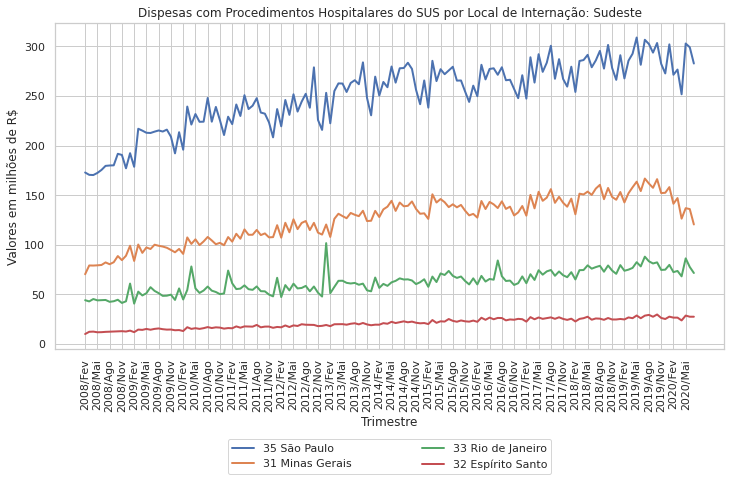

In [53]:
# plotando valores resultantes
ax = usaveis_ord.iloc[usaveis_ord.index.str.startswith('3')].T.plot(figsize = (12,6), linewidth = 2)

# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

# ajustando a localização da legenda
plt.legend(bbox_to_anchor=(0.25, -0.4, .5, .1), loc="lower left", ncol = 2, mode = "expand");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: Sudeste");
plt.xlabel("Trimestre");
plt.ylabel("Valores em milhões de R$");

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis_ord.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);

Comparando cada região do país

In [54]:
# groupby permite agrupar os dados por uma coluna
# sum realiza o somatório resultante do agrupamento por coluna
usaveis_ord_reg.groupby('Região').sum()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro Oeste,44574514.79,51830387.75,51359623.44,50283669.63,52009888.28,51265708.77,51180178.66,52934204.45,53081928.67,52045894.18,49701015.57,53779527.53,51535369.24,62084658.66,59721577.61,61055214.57,61061605.92,61368348.10,65646951.59,62286860.39,60853444.35,60309484.79,57942210.25,61510507.36,56905819.66,67930541.39,62094796.54,69948537.90,62607799.75,62701526.87,67508546.42,65547681.48,63011373.59,62074258.52,58834251.88,63773858.19,61545950.39,70688800.87,66191750.11,68302530.28,...,81656070.46,87289724.42,84754519.35,84900688.92,89811624.02,81895899.60,86144901.43,80291993.87,77885341.55,84404467.61,78608626.50,88831063.96,86257370.78,89621383.29,85110706.09,88011735.19,89922399.12,85489098.45,90179299.63,85098701.05,81999472.22,86416800.96,82993576.61,88233197.10,90983764.47,95299526.66,88771429.12,92583303.06,95283271.77,91799654.68,93831963.79,89265376.48,84929663.80,90840178.95,84577615.64,85764971.80,73219693.75,83992872.23,88341074.99,81324695.69
Nordeste,143170221.70,163986250.16,169546980.47,169279054.51,161307575.30,182631707.98,166813086.44,168149195.92,170330608.76,165396711.32,163085801.66,202595491.38,163451462.14,204609388.78,195038574.57,199391698.85,191469883.45,198725363.21,202722430.11,198393665.99,200684037.33,192584246.77,184367168.39,239363499.24,177953656.96,217389417.25,204724200.36,222675880.46,194423247.10,201845931.69,212368422.20,204038687.98,204915989.17,200577037.43,195548998.56,210059507.90,202899441.81,220220628.75,212622075.24,222125480.77,...,274260574.14,304199292.96,284478452.35,292572852.35,304413487.25,282228280.62,295937549.16,280123199.32,269787499.34,293723811.29,259239528.41,296439744.20,303031041.02,312691505.68,292611640.07,305217110.82,315754956.58,290161937.70,315437604.30,291771630.25,278660709.51,303716429.55,284772373.71,299400607.05,308351934.78,332241953.25,300860901.65,324737398.29,321122642.13,317420669.40,325348004.05,304280785.96,291045984.59,313214292.70,286186822.01,284252110.84,247582825.54,291127863.98,282825489.06,245911328.83
Norte,38844188.02,42058042.63,43806481.51,45231240.95,44643930.10,43735684.31,44224992.50,44499904.46,44847041.79,44277312.77,44950230.48,48215212.04,45308586.15,54026837.93,51813801.79,51645252.76,50881864.42,51036564.73,52887096.10,51018856.28,52933630.77,51308379.31,49144353.01,51588403.75,48521391.60,56875455.88,54444882.95,56246429.60,52818872.35,52754387.98,55104821.48,54613086.14,53876926.72,52932831.88,51928975.79,55136001.00,51902595.32,58230589.86,55979350.00,56620466.46,...,65605194.83,70562029.99,68342011.18,68995718.93,70621753.19,68434808.74,69735041.10,67354871.16,66307093.09,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76277098.92,78765536.95,75414428.92,74370763.81,77196660.63,73819692.73,71682268.87,65225598.45,83998905.79,75232976.77,58932690.50
Sudeste,297291483.85,304755569.67,307074038.20,307411386.26,311017861.48,318279330.75,315144195.00,318035764.58,337698269.16,329263923.96,321556374.04,365658781.11,314832090.23,384431908.

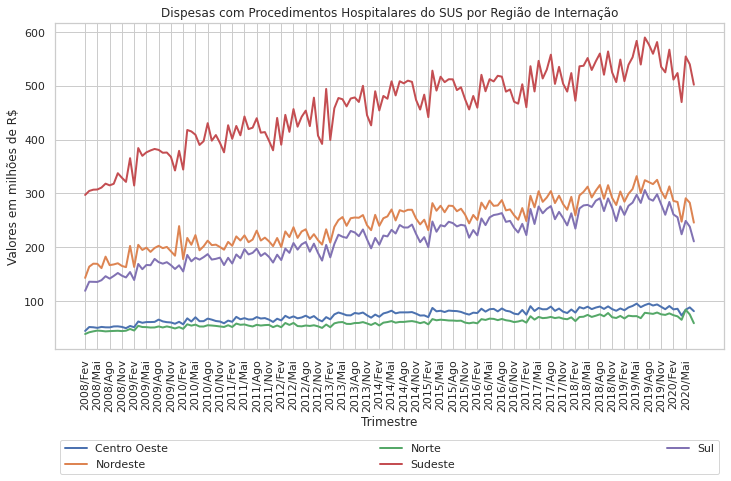

In [55]:
# plotando valores resultantes
ax = usaveis_ord_reg.groupby('Região').sum().T.plot(figsize = (12,6), linewidth = 2)

# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

# ajustando a localização da legenda
plt.legend(bbox_to_anchor=(0., -0.4, 1, .1), loc="lower left", ncol = 3, mode = "expand");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Região de Internação");
plt.xlabel("Trimestre");
plt.ylabel("Valores em milhões de R$");

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis_ord_reg.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);

### Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

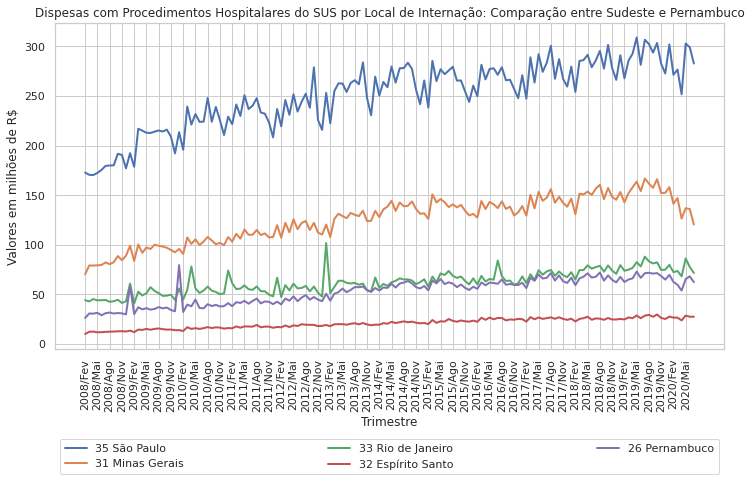

In [56]:
# plotando valores resultantes
ax = pd.concat([usaveis_ord.iloc[usaveis_ord.index.str.startswith('3')].T, 
                usaveis_ord.iloc[6]], axis = 1).plot(figsize = (12,6), linewidth = 2)

# ajusta o formato de y, divindo valores por 100000 para facilitar a visualização. 
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y/1000000)))

# ajustando a localização da legenda
plt.legend(bbox_to_anchor=(0., -0.4, 1., .102), loc="lower left", ncol = 3, mode = "expand");
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: Comparação entre Sudeste e Pernambuco");
plt.xlabel("Trimestre");
plt.ylabel("Valores em milhões de R$");

#Coloca uma quantidade maior de informações no eixo x e rotaciona 90 graus
ax.set_xticks(np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3));
ax.set_xticklabels(usaveis_ord.T.index[np.arange(0, ax.lines[0].get_xdata()[-1]+1, 3)]);
plt.xticks(rotation=90);

## **Aula 4: Analise de gráficos e criação de hipótese**

Text(0, 0.5, 'Milhões de R$')

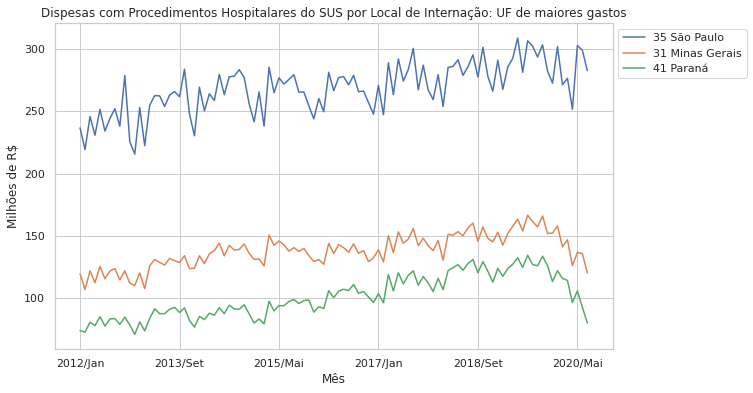

In [57]:
#dividindo por Milhões para facilitar a compreenção de grandezas
usaveis_ord_K = usaveis_ord / 1000000 

#separando uma janela do período específico
usaveis_ord_K[usaveis_ord_K.columns[47:150]].head(3).T.plot(figsize=(10,6)) 

# bbox_to_anchor reposiciona a legenda manualemnte (Dica do colega Flavio Cardoso )
plt.legend(bbox_to_anchor=(1,1));

plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: UF de maiores gastos");
plt.xlabel("Mês");
plt.ylabel("Milhões de R$")

Text(0, 0.5, 'Gastos em Milhões de R$')

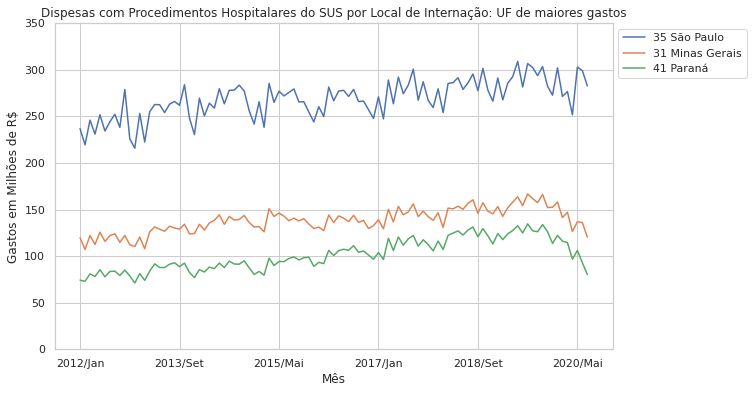

In [58]:
# Manipulando os eixos x e y, podemos distorcer os gráficos, levando a falsas impressão e levar a conclusões erradas

#dividindo por Milhões para facilitar a compreenção de grandezas
usaveis_ord_K[usaveis_ord_K.columns[47:150]].head(3).T.plot(figsize=(10,6))

# definindo o início do eixo y para 0, o gráfico fica visualmente e proporcionalmente mais honesto
plt.ylim(0, 350);

# bbox_to_anchor reposiciona a legenda manualemnte (Dica do colega Flavio Cardoso )
plt.legend(bbox_to_anchor=(1,1));

plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: UF de maiores gastos");
plt.xlabel("Mês");
plt.ylabel("Gastos em Milhões de R$")

## **Aula 5: Manipulação e interpretação de gráficos**

In [59]:
usaveis_ord.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Abr,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,263471759.13,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,136715099.44,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,106027687.78,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,5

In [60]:
# Mês mais recente no caso é 2020/Jul
gastos_mes_mais_recente = usaveis_ord[usaveis_ord.columns[-1]]
gastos_mes_mais_recente.head()

Unidade da Federação
35 São Paulo           282709570.31
31 Minas Gerais        120467187.34
41 Paraná               80320852.69
43 Rio Grande do Sul    78929703.81
33 Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

Um gráfico de piza ordenado ainda apresenta dificuldades com o grau de grandeza entre as variáveis apresentadas, sem contar a dificuldade de apresentar um grande número de informações.

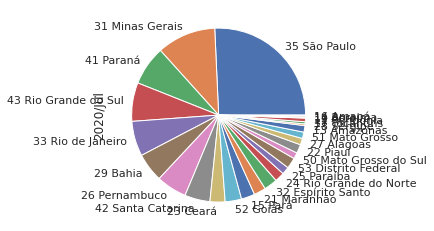

In [61]:
gastos_mes_mais_recente.plot(kind = 'pie')

Um grafico de piza desordenado não apresenta claramente a comparação entre as fatias, por exemplo qual o terceiro estado com maior gasto.

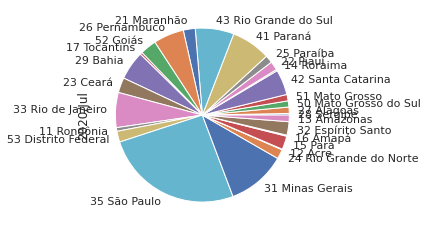

In [62]:
# sample traz uma amostra de uma população, com frac indicando qula a fração da população a ser considerada
gastos_mes_mais_recente.sample(frac=1).plot(kind = 'pie');

Tabela comparativa proporcional entre Rio de Janeiro e demais Estados

In [63]:
(gastos_mes_mais_recente/gastos_mes_mais_recente.loc['33 Rio de Janeiro']).head()

Unidade da Federação
35 São Paulo           3.95
31 Minas Gerais        1.68
41 Paraná              1.12
43 Rio Grande do Sul   1.10
33 Rio de Janeiro      1.00
Name: 2020/Jul, dtype: float64

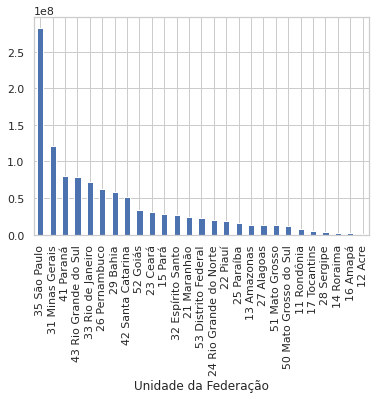

In [64]:
gastos_mes_mais_recente = gastos_mes_mais_recente.sort_values(ascending=False)
gastos_mes_mais_recente.plot(kind='bar');

Percebemos que no último mês, as UF com maiores gastos são São Paulo e Minas Gerais, as quais também são as UF com maiores gastos totais.

### Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

In [65]:
#remover os códigos das UF
gastos_mes_mais_recente.index = gastos_mes_mais_recente.index.str[3:]
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo           282709570.31
Minas Gerais        120467187.34
Paraná               80320852.69
Rio Grande do Sul    78929703.81
Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

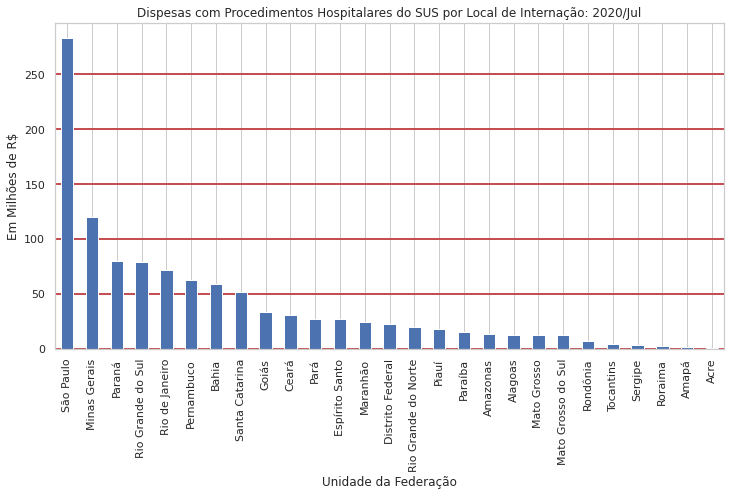

In [66]:
gastos_mes_mais_recente_K = gastos_mes_mais_recente/1000000
gastos_mes_mais_recente_K.plot(kind='bar', figsize=(12,6))
plt.grid(axis='y', linestyle='-', linewidth=2, color='r')
plt.ylabel("Em Milhões de R$")
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação: 2020/Jul");

### Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Tabela comparativa de Dispesas com Procedimentos Hospitalares do SUS por Local de Internação em função de Minas Gerais para o mês mais recente

In [67]:
MG_Func_mes_mais_recente = gastos_mes_mais_recente/gastos_mes_mais_recente.loc['Minas Gerais']
MG_Func_mes_mais_recente

Unidade da Federação
São Paulo             2.35
Minas Gerais          1.00
Paraná                0.67
Rio Grande do Sul     0.66
Rio de Janeiro        0.59
Pernambuco            0.52
Bahia                 0.49
Santa Catarina        0.43
Goiás                 0.28
Ceará                 0.26
Pará                  0.23
Espírito Santo        0.23
Maranhão              0.20
Distrito Federal      0.18
Rio Grande do Norte   0.16
Piauí                 0.15
Paraíba               0.13
Amazonas              0.11
Alagoas               0.11
Mato Grosso           0.11
Mato Grosso do Sul    0.10
Rondônia              0.06
Tocantins             0.04
Sergipe               0.03
Roraima               0.02
Amapá                 0.02
Acre                  0.01
Name: 2020/Jul, dtype: float64

A Tabela de gastos comparativa em função de uma UF traz números exatos de quantas vezes cada outra UF gastou em comparação aquela. Neste caso podemos dizer facilmente que Pernambuco, por exemplo, gastou metade do que foi gasto por Minas Gerais com dispesas hospitalares no último mês.

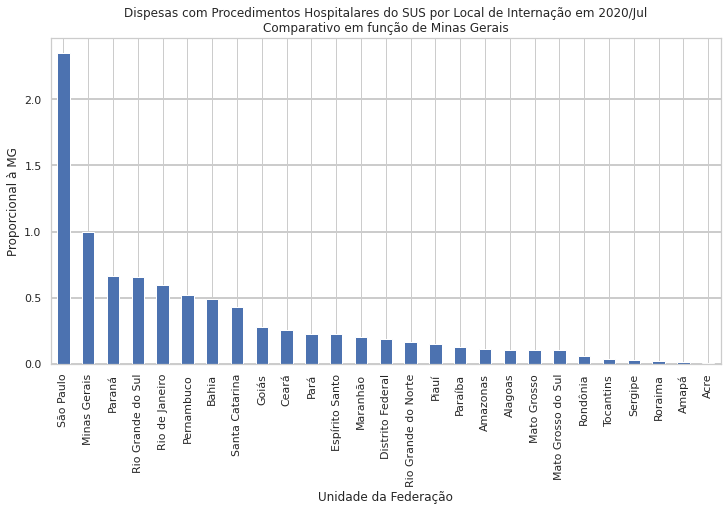

In [68]:
MG_Func_mes_mais_recente.plot(kind = "bar", figsize=(12,6))
plt.grid(axis='y',linestyle='-', linewidth=2)
plt.title('Dispesas com Procedimentos Hospitalares do SUS por Local de Internação em 2020/Jul\nComparativo em função de Minas Gerais');
plt.ylabel("Proporcional à MG");

Ao realizar um gráfico com gastos proporcionais com referência a uma UF, podemos observar que o formato do gráfico permanesse o mesmo, porém as grandezas representadas no eixo y são alteradas, podendo, assim, compara rapidamente quão maior foi os gastod de São Paulo comparado aos de Minas Gerais, por exemplo.

Agora, temos a comparação dos outros Estados em relação ao estado de Minas Gerais. Notamos que:

*   O estado com maior gasto, São Paulo, gastou mais de 2,5 vezes que o estado de Minas Gerais
*   Apenas 6 das 26 UF's gastaram mais que 50% do valor gasto por MG.

Foi possível ver durante toda a análise que os valores gastos por São Paulo em comparação com os demais estados é muito maior. Contudo essa comparação é injusta, uma vez que cada estado atende um número diferente de cidadãos. Uma comparação melhor e mais justo seria comparar proporcionalmente por número de habitante ou pela quantidade de atendimentos realizados.

### Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Hipótese 1: São Paulo gastou proporcionalmente mais que os demais estados com relação ao número de habitantes no último mês.

Hipótese 2: Acre gastou proporcionalmente menos que os demais estados com relação ao número de habitantes no último mês.

Para comprir este desafio, primeiramente devo investigar as informações populacionais dos estados no ano de 2020. Para isto baixei os dados sobre UF do IBGE (https://www.ibge.gov.br/cidades-e-estados.html?view=municipio) e fiz upload no GitHub.

In [69]:
url = 'https://raw.githubusercontent.com/deboraaires/bootcamp_alura/main/Estados%20do%20Brasil.csv'

#Criando um DataFrame em dados
#Aqui utilizei o utf-8 pois o arquivo xlsx foi salvo como csv utf-8 com ; como separador
dadosPopulacao = pd.read_csv(url,
                    encoding="utf-8", 
                    skiprows = 2,
                    skipfooter=15,
                    sep=";",
                    engine='python')

#Apresenta os 5 primeiros valores
dadosPopulacao.head()

,UF [-],Código [-],Gentílico [-],Governador [2019],Capital [2010],Área Territorial - km² [2019],População estimada - pessoas [2020],Densidade demográfica - hab/km² [2010],Matrículas no ensino fundamental - matrículas [2018],IDH <span>Índice de desenvolvimento humano</span> [2010],Receitas realizadas - R$ (×1000) [2017],Despesas empenhadas - R$ (×1000) [2017],Rendimento mensal domiciliar per capita - R$ [2019],Total de veículos - veículos [2018]
0,Acre,12,acriano,GLADSON DE LIMA CAMELI,Rio Branco,164123.96,894470,4.47,157646,0.66,6632883.11,6084416.81,890,277831
1,Alagoas,27,alagoano,JOSE RENAN VASCONCELOS CALHEIROS FILHO,Maceió,27843.29,3351543,112.33,490587,0.63,11950438.46,10460634.92,731,834827
2,Amapá,16,amapaense,ANTONIO WALDEZ GÓES DA SILVA,Macapá,142470.76,861773,4.69,136185,0.71,5396417.14,4224464.09,880,195039
3,Amazonas,13,amazonense,WILSON MIRANDA LIMA,Manaus,1559167.89,4207714,2.23,705007,0.67,17328459.43,15324896.56,842,883083
4,Bahia,29,baiano,RUI COSTA DOS SANTOS,Salvador,564760.43,14930634,24.82,2034711,0.66,50191003.24,45570160.00,913,4139107


In [70]:
#Selecionando somente as colunas necessárias
Populacao2020 = dadosPopulacao[['UF [-]','População estimada - pessoas [2020]']]
#Renomeando o nome daso colunas
Populacao2020 = Populacao2020.rename(columns={'UF [-]':"UF", 'População estimada - pessoas [2020]':"População"})
#Tornando a coluna UF um index
Populacao2020 = Populacao2020.set_index('UF')
#Selecionando uma série específica dos dados, no caso a série de População
Populacao2020 = Populacao2020[Populacao2020.columns[-1]]
Populacao2020.head()

UF
Acre          894470
Alagoas      3351543
Amapá         861773
Amazonas     4207714
Bahia       14930634
Name: População, dtype: int64

In [71]:
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo           282709570.31
Minas Gerais        120467187.34
Paraná               80320852.69
Rio Grande do Sul    78929703.81
Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

In [72]:
#Como temos duas séries com o mesmo índice, podemos dividir uma pela outra
gastos_2020Jul_Pop = gastos_mes_mais_recente/Populacao2020
#Ordenando valores do maior para o menor
gastos_2020Jul_Pop = gastos_2020Jul_Pop.sort_values(ascending=False)
gastos_2020Jul_Pop.head()

Distrito Federal    7.28
Santa Catarina      7.14
Paraná              6.97
Rio Grande do Sul   6.91
Espírito Santo      6.76
dtype: float64

In [73]:
gastos_2020Jul_Pop.index

Index(['Distrito Federal', 'Santa Catarina', 'Paraná', 'Rio Grande do Sul',
       'Espírito Santo', 'Pernambuco', 'São Paulo', 'Minas Gerais',
       'Rio Grande do Norte', 'Piauí', 'Goiás', 'Mato Grosso do Sul',
       'Roraima', 'Rondônia', 'Rio de Janeiro', 'Bahia', 'Alagoas', 'Paraíba',
       'Mato Grosso', 'Maranhão', 'Ceará', 'Pará', 'Amazonas', 'Tocantins',
       'Amapá', 'Sergipe', 'Acre'],
      dtype='object')

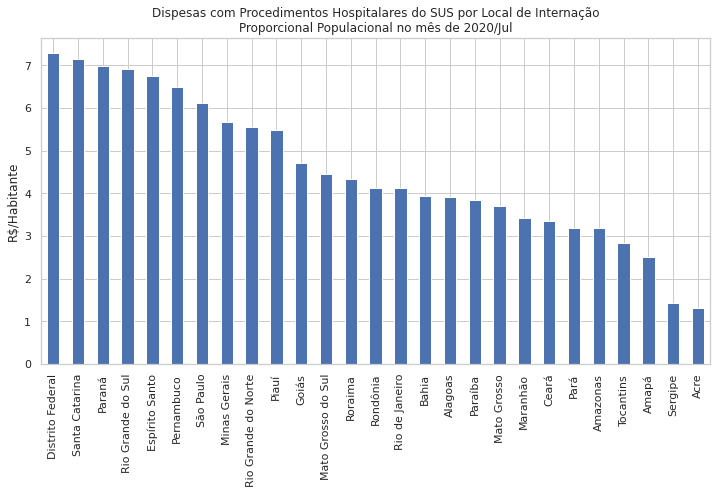

In [74]:
#Gráfico de gasto proporcional populacional no mes de Jul
gastos_2020Jul_Pop.plot(kind = 'bar', figsize=(12,6))
plt.title('Dispesas com Procedimentos Hospitalares do SUS por Local de Internação\nProporcional Populacional no mês de 2020/Jul')
plt.ylabel('R$/Habitante');

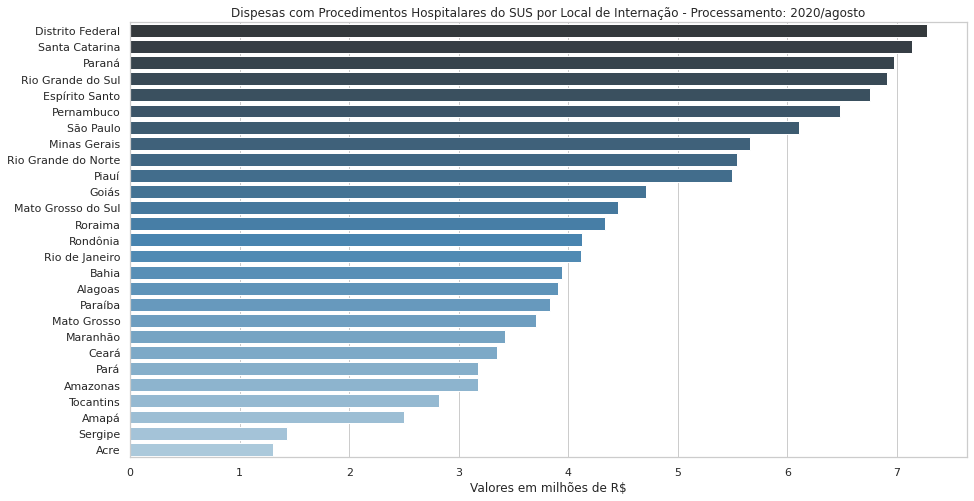

In [75]:
#Gráfico de gasto proporcional populacional no mes de Jul com seaborn

# redimenciona o tamanho da figura a ser exibida
plt.figure(figsize=(15,8))

# escolher a palheta de cores e o número de categorias representadas
palette = sns.color_palette("Blues_d", n_colors=27)
# inverte a paleta de cores para destacar o estado com mais gastos
palette.reverse()

#adiciona um grid branco para facilitar a visualização
sns.set_theme(style="whitegrid")

# plot gráfico de barras do seaborn do tipo barra horizontal de um DataFrame
# para inverter o gráfico para barras verticais basta inverter o x com o y
s = sns.barplot(x=gastos_2020Jul_Pop, y=gastos_2020Jul_Pop.index, palette=palette);

# adiciona título e nome dos eixos
plt.title("Dispesas com Procedimentos Hospitalares do SUS por Local de Internação - Processamento: 2020/agosto")
plt.xlabel("Valores em milhões de R$");

Após esta análise, podemos facilmente negar a Hipótese 1, uma vez que proporcionalmente ao tamanho da população, a UF que mais gastou por habitante em 2020/Jul foi o DF, gastando cerca de 7,5 reais por habitante, enquanto SP ficou em 7º lugar, gastando cerca de 6,10 reis por habitante.

Pode-se, no entanto, aceitar a hipótese 2, pois mesmo em relação ao tamanho populacional, o estado do Acre ainda foi a UF que teve o menor gasto por habitante, cerca de 1,30 reais.

### Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Feito acima.

### Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

Feito acima.

### Super Desafio: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.

## **Revisão monitoria 2**

In [76]:
print('Olá mundo')

Olá mundo


In [77]:
nome='Allan'
print(nome)

Allan


In [78]:
a = 3
b = 2

In [79]:
a+b

5

In [80]:
a*b

6

In [81]:
a**2 # potência

9

In [82]:
a/b

1.5

In [83]:
type(a)

int

In [84]:
type(a/b)

float

Calculadora que eleva ao quadrado

In [85]:
def calculadora (nome,numero):
  print(f'Olá {nome}') # a variável deve aparecer entre {} no print e a letra f simpoliza que o print vai imprimir uma variável
  print('O valor do disco é:')
  print(numero**2)

In [86]:
c = 'debora'
calculadora(c,20)

Olá debora
O valor do disco é:
400


In [87]:
dir('debora') # dir exibe todos os métodos disponíveis para o tipo passado

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [88]:
help('debora'.capitalize) #help descreve a função pesquisada

Help on built-in function capitalize:

capitalize() method of builtins.str instance
    Return a capitalized version of the string.
    
    More specifically, make the first character have upper case and the rest lower
    case.



In [89]:
def calculadora (nome):
  # a variável deve aparecer entre {} no print
  # a letra f (fstring (método de interpolação de string) -> ​format) simpoliza que o print vai imprimir uma variável
  print(f'Olá {nome.capitalize()}')
  dinheiros = float(input('Qual o Valor de compra  do disco? '))
  numeros = dinheiros**2
  print(f'O valor de venda do disco é: R$ {numeros:.2f}')

In [90]:
calculadora('debora')

Olá Debora
Qual o Valor de compra  do disco? 25
O valor de venda do disco é: R$ 625.00


Comparando

In [91]:
a>b

True

In [92]:
a == b

False

In [93]:
a != 5

True

In [94]:
a == 3 or b == 3

True

In [95]:
a == 3 and b == 3

False

In [96]:
disco_cliente = 'Fear of the Dark'
discos = ['Fear of the Dark', 'Abbey Road','4 Estações','Furacão 2000']

In [97]:
discos[0]

'Fear of the Dark'

In [98]:
discos[1]

'Abbey Road'

In [99]:
discos[-1]

'Furacão 2000'

In [100]:
discos[0:2] # o último intervalo é um intervalo  aberto / excludente

['Fear of the Dark', 'Abbey Road']

Temos esse disco?

In [101]:
def tem_esse(nome):
  discos = ['Fear of the Dark', 'Abbey Road','4 Estações','Furacão 2000']
  if nome == discos[0]:
    print('Sim, temos este disco')
  else:
    print('Não temos este disco')


In [102]:
tem_esse(disco_cliente)

Sim, temos este disco


In [104]:
range(10)

range(0, 10)

In [103]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [108]:
def varios_discos(nome):
    discos = ['Fear of the Dark', 'Abbey Road','4 Estações','Furacão 2000','Aviões do Forró']
    for disco in discos:
      if nome == disco:
        print(f'Temos o disco: {nome}')

In [109]:
varios_discos('Aviões do Forró')

Temos o disco: Aviões do Forró


In [110]:
def varios_discos(nome):
    discos = ['Fear of the Dark', 'Abbey Road','4 Estações','Furacão 2000','Aviões do Forró']
    if nome in discos:
      print(f'Temos o disco: {nome}')

In [111]:
varios_discos('Aviões do Forró')

Temos o disco: Aviões do Forró


In [112]:
discos.append('Nine lives')

In [113]:
discos

['Fear of the Dark', 'Abbey Road', '4 Estações', 'Furacão 2000', 'Nine lives']

In [114]:
discos[0]='Brincadeira de Criança'

In [115]:
discos

['Brincadeira de Criança',
 'Abbey Road',
 '4 Estações',
 'Furacão 2000',
 'Nine lives']

In [116]:
# uma lista é definido com [] e nós conseguimos alterar
# uma tupla  é definito com () e é fixa, não pode alterar
discos_fixos =('Brincadeira de Criança',
 'Abbey Road',
 '4 Estações',
 'Furacão 2000',
 'Nine lives')

In [117]:
discos_fixos[0] = 'Fear of the Dark'

TypeError: ignored

In [118]:
#dicionário é definido com {}
dici_discos = {'Brincadeira de Criança': 1,
 'Abbey Road': 2,
 '4 Estações': 3,
 'Furacão 2000': 4,
 'Nine lives': 5}

In [119]:
dici_discos['4 Estações']

3

In [137]:
#Cria um DataFrame com 3 linhs contendo as informações de dentro do [[]] -> DataFrame
dados = pd.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
dados

,A,B
0,4,9
1,4,9
2,4,9


In [130]:
dir(dados)

['A',
 'B',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

In [138]:
# apply modifica o DF de diversas formas
# a função lambda funciona como um for, modificando todas as linhas ou colunas do DF
dados = dados.apply(lambda x: [1, 2], axis=1, result_type='broadcast')
dados

,A,B
0,1,2
1,1,2
2,1,2


#**Módulo 02: Visualização de dados com Seaborn e Matplotlib**

Neste módulo seguiremos nas análises dos dados financeiros do SUS. Vamos mais fundo no tratamento e manipulação dos dados para análises mais complexas, utilizando recursos mais avançados do Pandas e da Linguagem Python como um todo.

Fontes de dados externas serão utilizadas para enriquecer a análise exploratória e realizar comparações mais precisas entre os diferentes estados. Além disso, discutiremos mais sobre boas práticas de visualização, interpretação de gráficos e sua construção com o Seaborn.

Vamos juntos e juntas, pois esse módulo está lotado de discussões interessantes!

## **Aula 1: Fontes externas, limpeza e manipulação**

In [141]:
gastos_mes_mais_recente.head()

Unidade da Federação
São Paulo           282709570.31
Minas Gerais        120467187.34
Paraná               80320852.69
Rio Grande do Sul    78929703.81
Rio de Janeiro       71540227.33
Name: 2020/Jul, dtype: float64

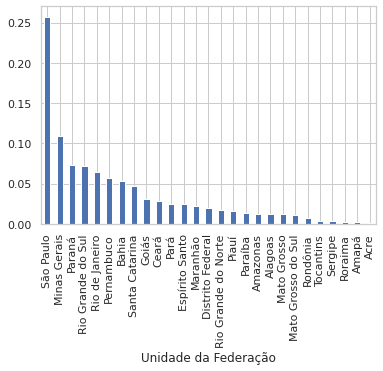

In [145]:
gastos_proporcionais = gastos_mes_mais_recente/ gastos_mes_mais_recente.sum()
gastos_proporcionais.plot(kind='bar')

In [149]:
# String python não pega multilinha, por isso precisa de 3 aspas """"""

dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

#Fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o

In [150]:
from io import StringIO

# criar um fluxo de entrada e saída para a string -> cria um leitor para a string
dados_da_populacao_io = StringIO(dados_da_populacao)

pd.read_csv(dados_da_populacao_io, sep="\t")

,Posição,Unidade federativa,População,% da pop. total,País comparável
0,(habitantes),NaN,NaN,NaN,NaN
1,1,São Paulo,46 289 333,"21,9%",Flag of Spain.svg Espanha (46 439 864)
2,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
3,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
4,4,Bahia Bahia,14 930 634,"7,1%",Chade (14 037 000)
5,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
6,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
7,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
8,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
9,9,Pará Pará,8 690 745,"4,1%",Áustria (8 602 112)


### Desafio 01: Ler arquivo direto do wikipedia.